In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
jetblue_NY=pd.read_csv(r'C:\Users\User\OneDrive\Desktop\Fordham\Programming with Python (CISC-5380-L01)\intro_to_python_project\data\jetblue_NYairports_featureEngineering_df.csv')
jetblue_NY.head()

,searchDate,route,flightDate,startingAirport,destinationAirport,travelDuration,elapsedDays,isBasicEconomy,isRefundable,isNonStop,...,segmentsDepartureAirportCode,segmentsAirlineName,segmentsDurationInSeconds,segmentsCabinCode,departureTime,arrivalTime,departureCategory,arrivalCategory,daysLeft,numStops
0,2022-04-16,ATL|EWR,2022-04-17,ATL,EWR,PT2H9M,0,False,False,True,...,ATL,JetBlue Airways,7740,coach,07:30:00,09:39:00,Morning,Morning,1,0
1,2022-04-16,ATL|JFK,2022-04-17,ATL,JFK,PT2H15M,0,False,False,True,...,ATL,JetBlue Airways,8100,coach,09:00:00,11:15:00,Morning,Noon,1,0
2,2022-04-16,ATL|JFK,2022-04-17,ATL,JFK,PT2H23M,0,False,False,True,...,ATL,JetBlue Airways,8580,coach,18:50:00,21:13:00,Afternoon,Evening,1,0
3,2022-04-16,ATL|LGA,2022-04-17,ATL,LGA,PT2H16M,0,False,False,True,...,ATL,JetBlue Airways,8160,coach,12:03:00,14:19:00,Noon,Noon,1,0
4,2022-04-16,ATL|LGA,2022-04-17,ATL,LGA,PT2H19M,0,False,False,True,...,ATL,JetBlue Airways,8340,coach,10:40:00,12:59:00,Morning,Noon,1,0


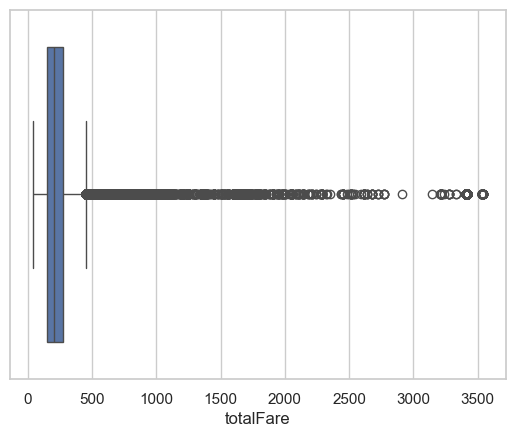

Q1: 148.60
Q3: 272.19
IQR: 123.59
Lower bound: -98.58, Upper bound: 519.37
Amount of outliers: 127,900, Amount of inliers: 3,821,580


In [25]:
# Boxplot
sns.boxplot(jetblue_NY, x='totalFare')
plt.show()

# Calculate bounds
q1, q3 = jetblue_NY['totalFare'].quantile([0.25, 0.75])
IQR = q3 - q1
lower_bound, upper_bound = q1 - 2 * IQR, q3 + 2 * IQR

# Print results
print(f'Q1: {q1:.2f}')
print(f'Q3: {q3:.2f}')
print(f'IQR: {IQR:.2f}')
print(f'Lower bound: {lower_bound:.2f}, Upper bound: {upper_bound:.2f}')

# Identify and count outliers
outliers = jetblue_NY[(jetblue_NY['totalFare'] < lower_bound) | (jetblue_NY['totalFare'] > upper_bound)]
inliers=len(jetblue_NY) - outliers.shape[0]
print(f'Amount of outliers: {outliers.shape[0]:,}, Amount of inliers: {inliers:,}')

count    3,949,480.00
mean           233.95
std            158.31
min             38.61
25%            148.60
50%            208.61
75%            272.19
max          3,544.35
Name: totalFare, dtype: object

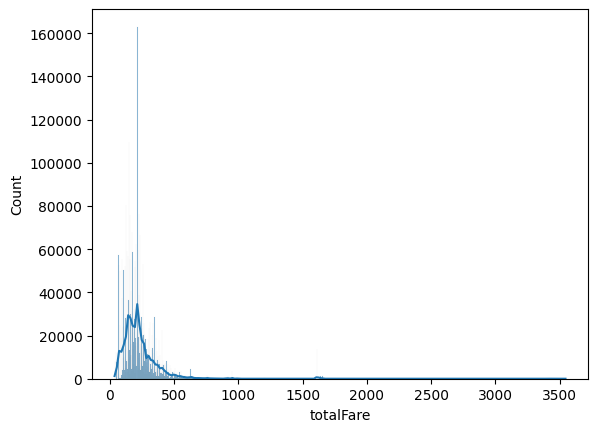

In [5]:
sns.histplot(jetblue_NY['totalFare'],kde=True)
jetblue_NY['totalFare'].describe().apply(lambda x: f'{x:,.2f}')

In [30]:
count_tickets_above1000=jetblue_NY[jetblue_NY['totalFare']>=1000].shape[0]
count_tickets_above1000
#There are 20,501 tickets are equal or more expensive than $1000

20501

In [ ]:
jetblue_NY_non_outliers=jetblue_NY[(jetblue_NY['totalFare']>=lower_bound)&(jetblue_NY['totalFare']<=upper_bound)]
jetblue_NY_non_outliers.shape


Our target variable has a right skewness.

Most of our price values in a range of under $1000.We can predict that these values contains alot of Economy class ,little of Businesss class.

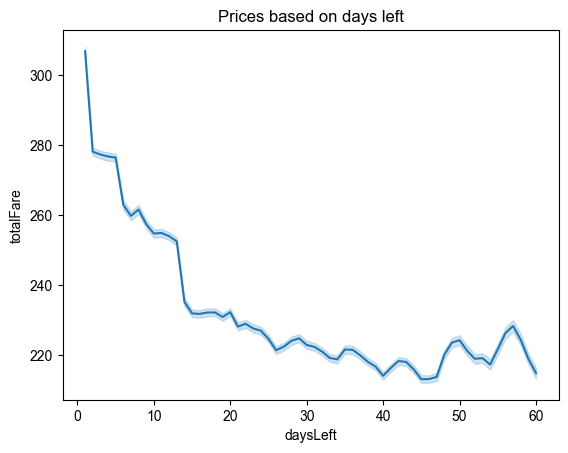

In [6]:
#price vs daysleft
sns.lineplot(jetblue_NY,x='daysLeft', y='totalFare').set(title='Prices based on days left')
sns.set_theme(style='whitegrid')


The graph highlights how the prices rise slowly 45 days before the flight and then drastically start rising 15 days before the flight. this indicates that airlines are starting to raise prices as the flight fills up and fewer seats remain.

Between approximately earlier than 45 days to 60 days, the price is highly fluctuate, but still under $240

The overall trend suggests that the best time to purchase tickets is well in advance (between 20-45 days, avoiding the fluctuation between earlier than 45 days and 60 days), as prices tend to be lower during this period.

**How the Ticket Price change based on the Departure Time and Arrival Time?**

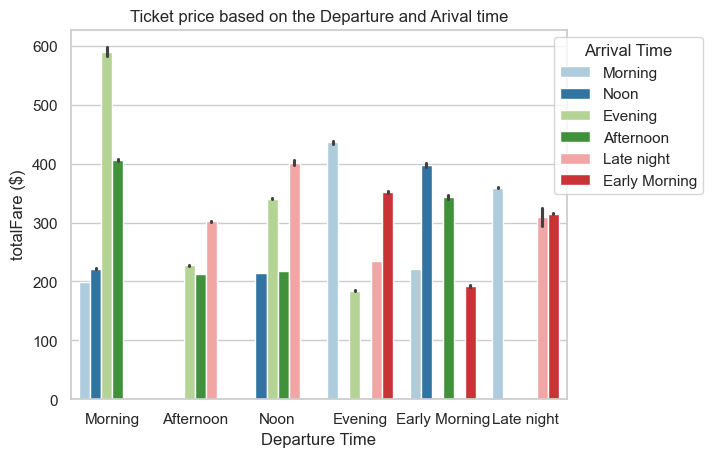

In [7]:
sns.barplot(jetblue_NY,x='departureCategory', y='totalFare', hue='arrivalCategory', palette='Paired').set(title='Ticket price based on the Departure and Arival time', xlabel='Departure Time',ylabel = 'totalFare ($)')
plt.legend(title='Arrival Time', bbox_to_anchor=(1.29, 1), loc='upper right')
sns.set_style('whitegrid')

## log transformation

In [9]:
data = pd.read_csv(r'C:\Users\alina\OneDrive\Documents\GitHub\intro_to_python_project\data\jetblue_NYairports_featureEngineering_df.csv')

In [17]:
import numpy as np
data['log_totalFare'] = np.log1p(data['totalFare'])

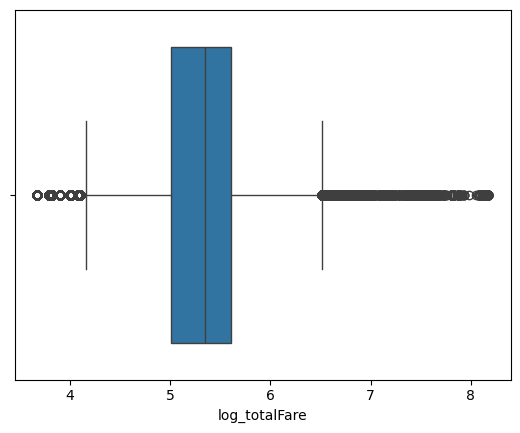

Q1: 5.01
Q3: 5.61
IQR: 0.60
Lower bound: 4.10, Upper bound: 6.51
Amount of outliers: 106,291, Amount of inliers: 3,843,189


In [18]:
# Boxplot
sns.boxplot(data, x='log_totalFare')
plt.show()

# Calculate bounds
q1, q3 = data['log_totalFare'].quantile([0.25, 0.75])
IQR = q3 - q1
lower_bound, upper_bound = q1 - 1.5 * IQR, q3 + 1.5 * IQR

# Print results
print(f'Q1: {q1:.2f}')
print(f'Q3: {q3:.2f}')
print(f'IQR: {IQR:.2f}')
print(f'Lower bound: {lower_bound:.2f}, Upper bound: {upper_bound:.2f}')

# Identify and count outliers
outliers = data[(data['log_totalFare'] < lower_bound) | (data['log_totalFare'] > upper_bound)]
inliers=len(data) - outliers.shape[0]
print(f'Amount of outliers: {outliers.shape[0]:,}, Amount of inliers: {inliers:,}')

count    3,949,480.00
mean             5.32
std              0.52
min              3.68
25%              5.01
50%              5.35
75%              5.61
max              8.17
Name: log_totalFare, dtype: object

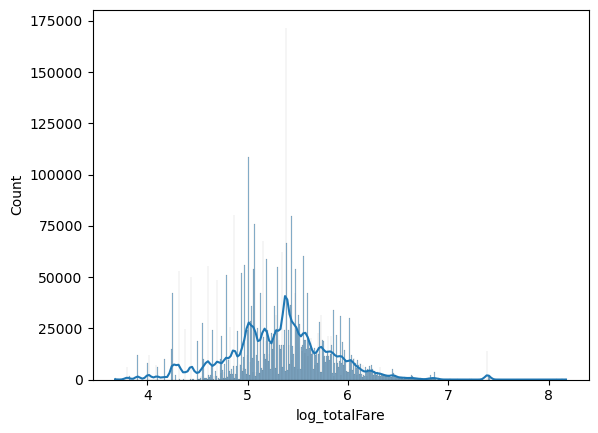

In [19]:
sns.histplot(data['log_totalFare'],kde=True)
data['log_totalFare'].describe().apply(lambda x: f'{x:,.2f}')

##### it seems that applying a log transformation cut the number of outliers in half, it also helped with the skewness, im going to try other methods to handle outliers

## boxcox transformation

In [8]:
from scipy.stats import boxcox
jetblue_NY['boxcox_totalFare'], _ = boxcox(jetblue_NY['totalFare'])


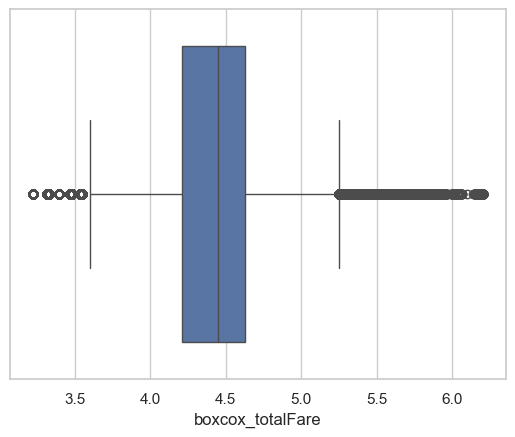

Q1: 4.21
Q3: 4.63
IQR: 0.42
Lower bound: 3.59, Upper bound: 5.25
Amount of outliers: 99,638, Amount of inliers: 3,849,842


In [10]:
# Boxplot
sns.boxplot(jetblue_NY, x='boxcox_totalFare')
plt.show()

# Calculate bounds
q1, q3 = jetblue_NY['boxcox_totalFare'].quantile([0.25, 0.75])
IQR = q3 - q1
lower_bound, upper_bound = q1 - 1.5 * IQR, q3 + 1.5 * IQR

# Print results
print(f'Q1: {q1:.2f}')
print(f'Q3: {q3:.2f}')
print(f'IQR: {IQR:.2f}')
print(f'Lower bound: {lower_bound:.2f}, Upper bound: {upper_bound:.2f}')

# Identify and count outliers
outliers = jetblue_NY[(jetblue_NY['boxcox_totalFare'] < lower_bound) | (jetblue_NY['boxcox_totalFare'] > upper_bound)]
inliers=len(jetblue_NY) - outliers.shape[0]
print(f'Amount of outliers: {outliers.shape[0]:,}, Amount of inliers: {inliers:,}')

count    3,949,480.00
mean             4.42
std              0.36
min              3.22
25%              4.21
50%              4.45
75%              4.63
max              6.21
Name: boxcox_totalFare, dtype: object

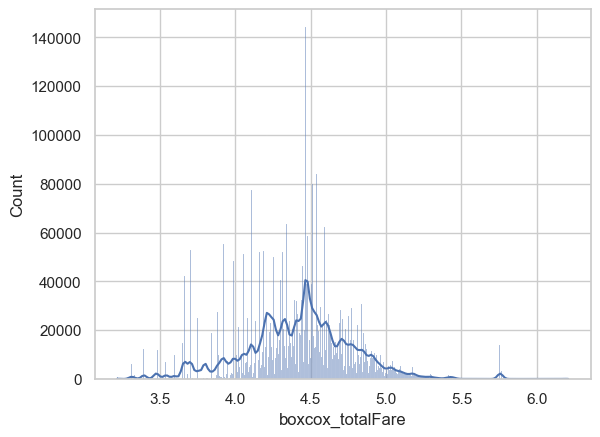

In [12]:
sns.histplot(jetblue_NY['boxcox_totalFare'],kde=True)
jetblue_NY['boxcox_totalFare'].describe().apply(lambda x: f'{x:,.2f}')


##### chatgpt said i could use a boxcox transformation and that got the number of outliers to less than 100 thousand, the skewness is almost the same as the log transformation

## Dropping Outliers

In [15]:
lower_bound, upper_bound

(3.588538579879335, 5.252438569003941)

In [17]:
jetblue_NY_non_outliers=jetblue_NY[(jetblue_NY['boxcox_totalFare']>=lower_bound)&(jetblue_NY['boxcox_totalFare']<=upper_bound)]
jetblue_NY_non_outliers.shape

(3849842, 28)

count    3,849,842.00
mean           225.04
std            107.64
min             63.60
25%            148.60
50%            208.61
75%            269.60
max            710.41
Name: totalFare, dtype: object

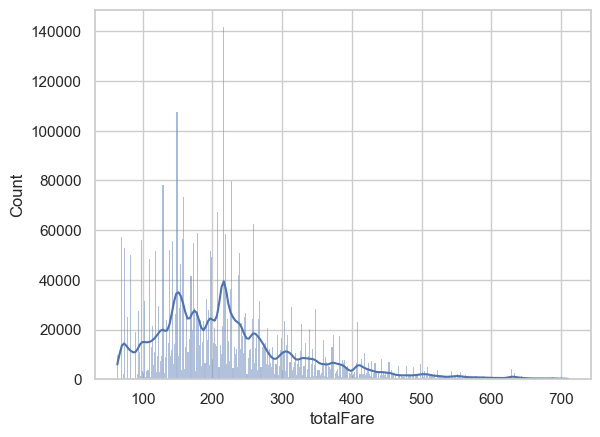

In [19]:
sns.histplot(jetblue_NY_non_outliers['totalFare'],kde=True)
jetblue_NY_non_outliers['totalFare'].describe().apply(lambda x: f'{x:,.2f}')

## Plotting

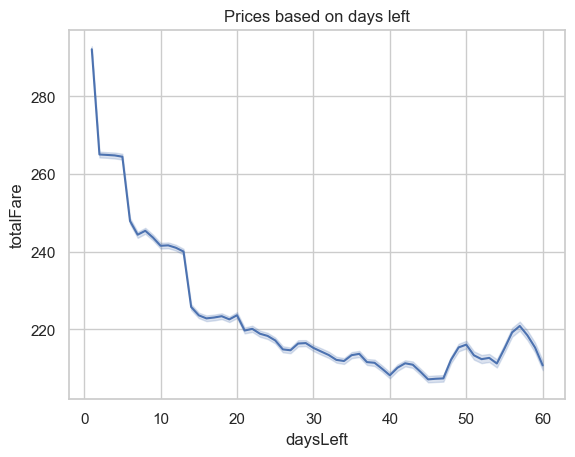

In [18]:
#price vs daysleft
sns.lineplot(jetblue_NY_non_outliers,x='daysLeft', y='totalFare').set(title='Prices based on days left')
sns.set_theme(style='whitegrid')

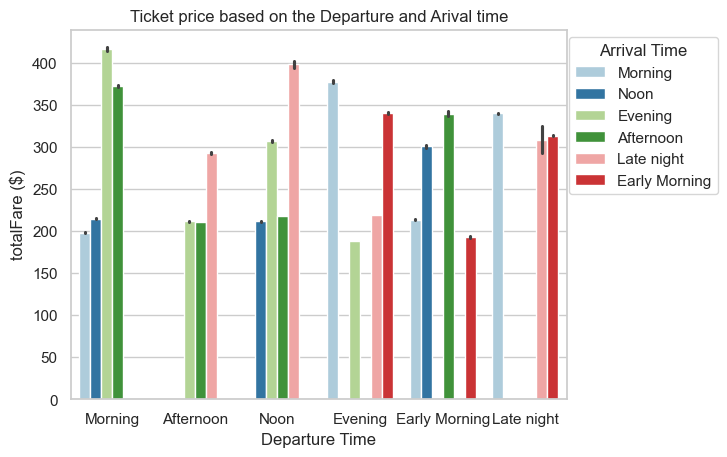

In [21]:
#TotalFare vs Departure and Arival time
sns.barplot(jetblue_NY_non_outliers,x='departureCategory', y='totalFare', hue='arrivalCategory', palette='Paired').set(title='Ticket price based on the Departure and Arival time', xlabel='Departure Time',ylabel = 'totalFare ($)')
plt.legend(title='Arrival Time', bbox_to_anchor=(1.32, 1), loc='upper right')
sns.set_style('whitegrid')

## capping outliers?

In [32]:
Q1 = data['totalFare'].quantile(0.25)  # 25th percentile (Q1)
Q3 = data['totalFare'].quantile(0.75)  # 75th percentile (Q3)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

data['capped_totalFare'] = data['totalFare'].clip(lower=lower_limit, upper=upper_limit)



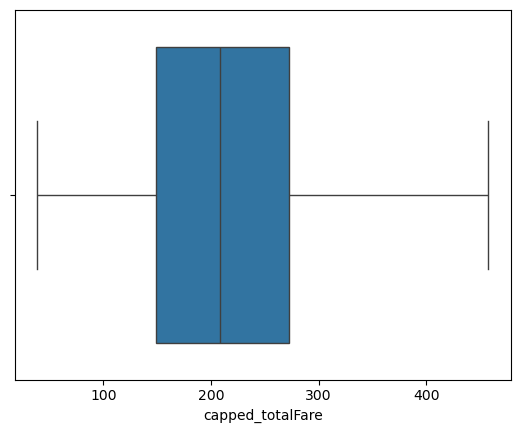

Q1: 148.60
Q3: 272.19
IQR: 123.59
Amount of outliers: 0, Amount of inliers: 3,949,480


In [34]:
# Boxplot
sns.boxplot(data, x='capped_totalFare')
plt.show()


# Print results
print(f'Q1: {q1:.2f}')
print(f'Q3: {q3:.2f}')
print(f'IQR: {IQR:.2f}')

# Identify and count outliers
outliers = data[(data['capped_totalFare'] < lower_limit) | (data['capped_totalFare'] > upper_limit)]
inliers=len(data) - outliers.shape[0]
print(f'Amount of outliers: {outliers.shape[0]:,}, Amount of inliers: {inliers:,}')

##### obviously, capping the outliers gives us no outliers, not too sure how helpful this is though, it is pretty intersting however. 

## going to try and replace the outliers with the mean and median

### mean

In [36]:
mean_value = data['totalFare'].mean()

# Replace outliers with the mean
data['mean_totalFare'] = data['totalFare'].apply(
    lambda x: mean_value if x < lower_limit or x > upper_limit else x
)

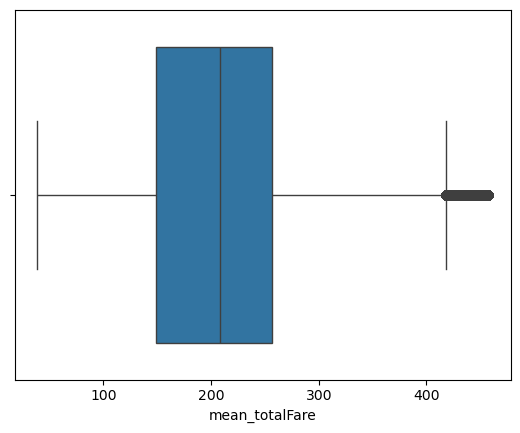

Q1: 148.60
Q3: 272.19
IQR: 123.59
Amount of outliers: 0, Amount of inliers: 3,949,480


In [37]:
# Boxplot
sns.boxplot(data, x='mean_totalFare')
plt.show()


# Print results
print(f'Q1: {q1:.2f}')
print(f'Q3: {q3:.2f}')
print(f'IQR: {IQR:.2f}')

# Identify and count outliers
outliers = data[(data['mean_totalFare'] < lower_limit) | (data['mean_totalFare'] > upper_limit)]
inliers=len(data) - outliers.shape[0]
print(f'Amount of outliers: {outliers.shape[0]:,}, Amount of inliers: {inliers:,}')

count    3,949,480.00
mean           210.90
std             86.32
min             38.61
25%            148.60
50%            208.61
75%            256.60
max            457.52
Name: mean_totalFare, dtype: object

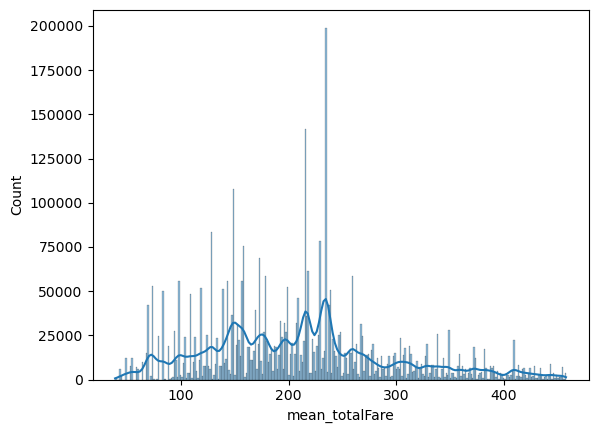

In [38]:
sns.histplot(data['mean_totalFare'],kde=True)
data['mean_totalFare'].describe().apply(lambda x: f'{x:,.2f}')

### median

In [39]:
median_value = data['totalFare'].median()

data['median_totalFare'] = data['totalFare'].apply(
    lambda x: median_value if x < lower_limit or x > upper_limit else x
)


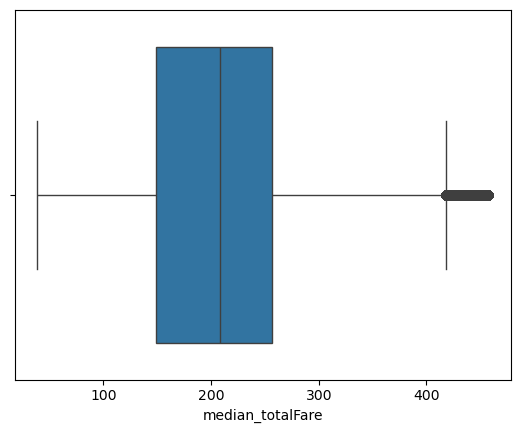

Q1: 148.60
Q3: 272.19
IQR: 123.59
Amount of outliers: 0, Amount of inliers: 3,949,480


In [40]:
# Boxplot
sns.boxplot(data, x='median_totalFare')
plt.show()


# Print results
print(f'Q1: {q1:.2f}')
print(f'Q3: {q3:.2f}')
print(f'IQR: {IQR:.2f}')

# Identify and count outliers
outliers = data[(data['median_totalFare'] < lower_limit) | (data['median_totalFare'] > upper_limit)]
inliers=len(data) - outliers.shape[0]
print(f'Amount of outliers: {outliers.shape[0]:,}, Amount of inliers: {inliers:,}')

count    3,949,480.00
mean           209.64
std             86.15
min             38.61
25%            148.60
50%            208.61
75%            256.60
max            457.52
Name: median_totalFare, dtype: object

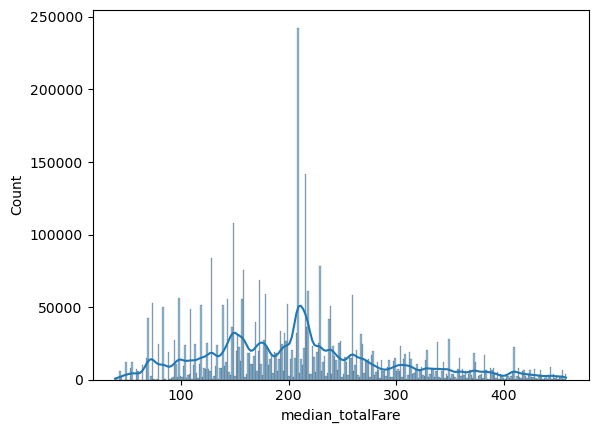

In [41]:
sns.histplot(data['median_totalFare'],kde=True)
data['median_totalFare'].describe().apply(lambda x: f'{x:,.2f}')

##### this does replace the values in our data so im not sure if we want to use this to handle outliers